# GeoPandas Workshop

Use what you have observed and learned the 5D-Geopandas session to create your own custom map.

In the cells below, there will be omissions (denoted with **\*\***) that need to be completed correctly to move on to the next step.

Once completed, you should have a map that looks that the one below…

## Import modules

This exercise will require four libraries to be imported. Can you spot the omission below?

In [1]:
# Replace the ** below and run the code
import contextily as ctx
import geopandas
import matplotlib.pyplot as plt
import pandas as pd

import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [ ]:
# Replace the ** below and run the code
import contextily as ctx
import **
import matplotlib.pyplot as plt
import pandas as pd

## Load LSOA shape file

Next we're going to load a zip file entitled `lsoa_dec_2011_eng_wales.zip`. This zip contains the shape files for LSOAs in England and Wales.

The CRS for the shape file is XXXX. Update the code below to load the geodataframe.

[GeoPandas read_file documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html)


In [2]:
# Replace the ** below and run the code
filename = "zip://./data/lsoa_dec_2011_eng_wales.zip"
lsoa_gdf = geopandas.read_file(filename, crs='EPSG:4326')
#lsoa_gdf = geopandas.read_file(filename, crs='EPSG:27700')

In [ ]:
# Replace the ** below and run the code
filename = "zip://./data/lsoa_dec_2011_eng_wales.zip"
lsoa_gdf = geopandas.read_file(filename, crs='EPSG:**')
lsoa_gdf = geopandas.read_file(filename, crs='EPSG:**')

Lets take a look a look at the first few rows of data the geodataframe.

In [3]:
# Replace the ** below and run the code
lsoa_gdf.head(3)

,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,geometry
0,1,E01000001,City of London 001A,City of London 001A,133320.768872,2291.846072,"POLYGON ((-0.09726 51.52158, -0.09649 51.52028..."
1,2,E01000002,City of London 001B,City of London 001B,226191.272990,2433.960112,"POLYGON ((-0.08810 51.51941, -0.08927 51.51752..."
2,3,E01000003,City of London 001C,City of London 001C,57302.966538,1142.359799,"POLYGON ((-0.09676 51.52325, -0.09644 51.52282..."


In [ ]:
lsoa_gdf.**(3)

Create a simple lot using the `plot()` method for the Geopandas DataFrame.

Which object will be calling the `plot()` method on?

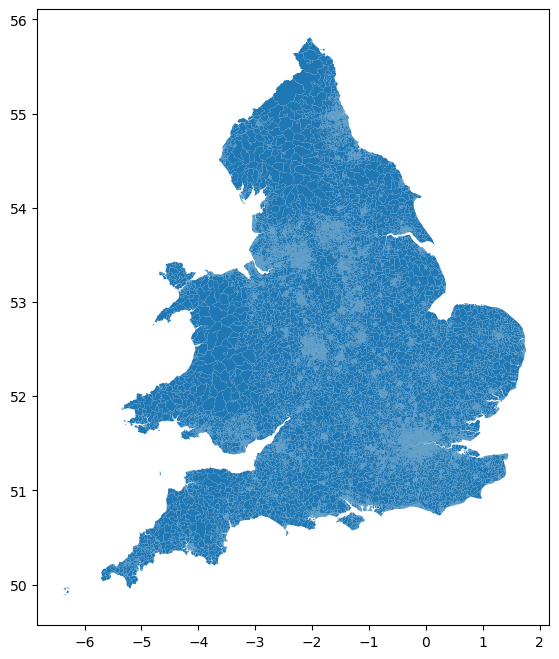

In [4]:
# Replace the ** below and run the code
lsoa_gdf.plot(figsize=(8,8));

In [ ]:
# Replace the ** below and run the code
**.plot(figsize=(8,8));

## Using Spatial Relationship methods to select data lower super output areas

First we'll need to import county boundary shape file, exactly as we did in the workshop.

Which method will be required to load the file?

What epsg was used in the workshop for this same file?

In [6]:
# Replace the ** below and run the code
filename = "zip://./data/Counties_and_Unitary_Authorities__December_2017" + \
    "__Boundaries_UK-shp.zip"

# Note - now performing same action as above - just in 2 distinct steps 
counties_gdf = geopandas.read_file(filename)
counties_gdf = counties_gdf.set_crs(epsg=27700)

In [ ]:
# Replace the ** below and run the code
filename = "zip://./data/Counties_and_Unitary_Authorities__December_2017" + \
    "__Boundaries_UK-shp.zip"

# Note - now performing same action as above - just in 2 distinct steps 
counties_gdf = geopandas.**(filename)
counties_gdf = counties_gdf.set_crs(epsg=**)

Lets take a look to make sure the imported counties plot correctly (using the `plot()` method).

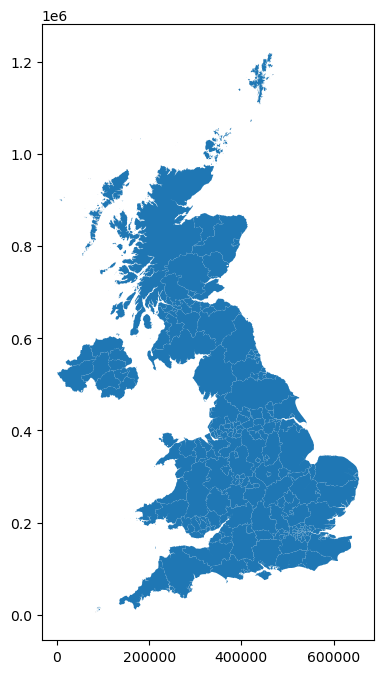

In [7]:
# Replace the ** below and run the code
counties_gdf.plot(figsize=(8,8));

In [ ]:
# Replace the ** below and run the code
**.plot(figsize=(8,8));

### Finding the North West/ Merseyside data

Next we meed to identify rows that are included in the list below using the Pandas `map` lambda function.

List of counties: Manchester, West Lancashire, Wirral, Blackpool, Liverpool, Sefton, Knowsley.

In [8]:
# Replace the ** below and run the code
mersey_nw = \
    counties_gdf['ctyua17nm'].map(
        lambda x: x in ['ManchesterLL',  'WLLest Lancashire',  'Wirral', 
                        'Blackpolol', 'Liverpool', 'Sefton', 'Knowsley'])

In [ ]:
# Replace the ** below and run the code
mersey_nw = \
    counties_gdf['ctyua17nm'].**(
        lambda x: x in [**, **, **, **])

Now add a new column to the `counties_gdf` geodataframe based on the pd.Series you’ve just created.

In [9]:
# Replace the ** below and run the code
counties_gdf['mersey_nw'] = mersey_nw

In [ ]:
# Replace the ** below and run the code
**['mersey_nw'] = mersey_nw

Next, create a mask based on the new column (created above) containing True values.

In [10]:
 # temp cell - just checking filter 
counties_gdf[counties_gdf['mersey_nw'] == True]

,objectid,ctyua17cd,ctyua17nm,ctyua17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,mersey_nw
66,67,E08000011,Knowsley,None,344762,393778,-2.83297,53.437881,8.650006e+07,68167.372622,"POLYGON ((341492.601 401060.297, 341578.803 40...",True
67,68,E08000012,Liverpool,None,339361,390553,-2.91364,53.408298,1.118356e+08,62700.011172,"POLYGON ((338935.099 397894.903, 339029.298 39...",True
69,70,E08000014,Sefton,None,334264,398832,-2.99204,53.482101,1.549909e+08,120319.870615,"MULTIPOLYGON (((336272.101 422872.103, 336303....",True
70,71,E08000015,Wirral,None,329242,386937,-3.06502,53.374538,1.570464e+08,75205.157003,"MULTIPOLYGON (((331059.903 394306.000, 331069....",True


In [11]:
# Replace the ** below and run the code
mask = counties_gdf['mersey_nw'] == True

In [ ]:
# Replace the ** below and run the code
mask = counties_gdf['**'] == True

Finally, filter the `counties_gdf` by the mask and assign to variable `mnw`.

In [12]:
# Replace the ** below and run the code
mnw = counties_gdf.loc[mask]

In [ ]:
# Replace the ** below and run the code
mnw = **.loc[mask]

Finally, plot the Mersey/ North West area.

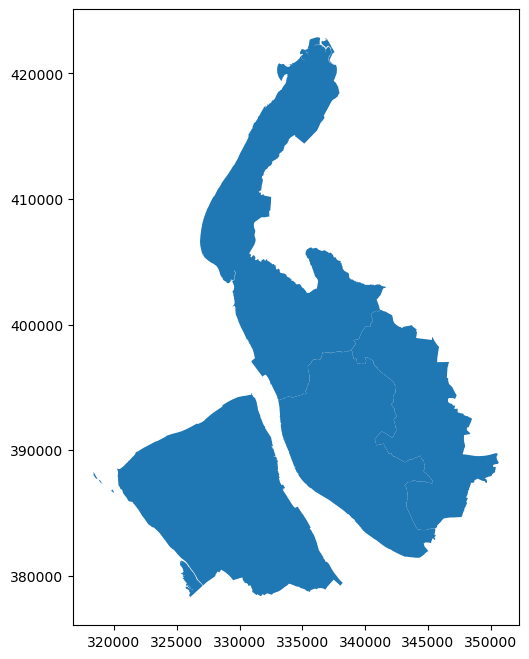

In [14]:
# Replace the ** below and run the code
mnw.plot(figsize=(8,8));

In [ ]:
# Replace the ** below and run the code
**.plot(figsize=(8,8));

## Merging areas together

Now we are going to merge LSOAs by whether they are in the Mersey/ North West area (or not) using the `dissolve()` method. This will take a few moments to run.

https://geopandas.org/aggregation_with_dissolve.html

In [15]:
# Replace the ** below and run the code
merged_gdf = counties_gdf.dissolve(by='mersey_nw')

In [ ]:
# Replace the ** below and run the code
merged_gdf = counties_gdf.**(by='mersey_nw')

Now we select just the geometry Mersey North West (`mersey_nw`) row, This has an index value of 'True'.

In [16]:
# Replace the ** below and run the code
dc_geometry = merged_gdf.loc[True].geometry

In [ ]:
# Replace the ** below and run the code
dc_geometry = merged_gdf.loc[**].geometry

Lets take a look to check.

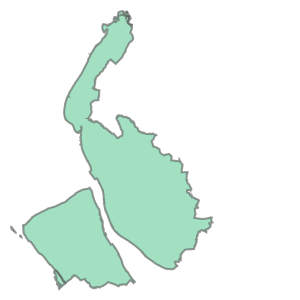

In [17]:
dc_geometry

### Spatial relationships

To get all LSOA in Mersey/ North West  area we need to apply a test for `overlaps` or `within`.

In [ ]:
##########################################
##########################################
## Below is where the issue starts..    ##
## I can't find any of my (small) areas ##
## within the counties                  ##
##########################################
##########################################

In [20]:
# temp cell
print(lsoa_gdf.overlaps(dc_geometry).sum())
print(lsoa_gdf.contains(dc_geometry).sum())
print(lsoa_gdf.crosses(dc_geometry).sum())
print(lsoa_gdf.within(dc_geometry).sum())
print(lsoa_gdf.touches(dc_geometry).sum())


0
0
0
0
0


In [21]:
# Replace the ** below and run the code
mask = (lsoa_gdf.overlaps(dc_geometry)) | (lsoa_gdf.within(dc_geometry)) | (lsoa_gdf.crosses(dc_geometry))

In [ ]:
# Replace the ** below and run the code
mask = (lsoa_gdf.**(dc_geometry)) | (lsoa_gdf.**(dc_geometry))

Create new Geopands DataFrame by applying mask to the `lsoa_gdf` geodataframe. Once this is done, take a look af the first 5 rows.

In [22]:
# Replace the ** below and run the code
mersey_nw_lsoa = lsoa_gdf.loc[mask]
mersey_nw_lsoa.head()

,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,geometry


In [ ]:
# Replace the ** below and run the code
mersey_nw_lsoa = **.loc[mask]
**.head()

Show map of new DataFrame

In [23]:
#  Replace the ** below and run the code
mersey_nw_lsoa.plot();

/home/elliott/miniconda3/envs/geopandas/lib/python3.8/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7facb0cf3dc0> (for post_execute):


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

<Figure size 640x480 with 1 Axes>

In [ ]:
#  Replace the ** below and run the code
**.plot();

## Loading point data (hospitals) and selecting those in Merseyside Northwest

Lets use the `read_file` method to load the CSV containing hospital location data then take a look at the first few rows.

In [ ]:
# Replace the ** below and run the code
hospitals_gdf = geopandas.read_file('./data/hosp_107.csv')
hospitals_gdf.head()

In [ ]:
# Replace the ** below and run the code
hospitals_gdf = geopandas.**('./data/hosp_107.csv')
hospitals_gdf.head()

Create a 'geometry' field manually using the `.points_from_xy` method

In [ ]:
# Replace the ** below and run the code
hospitals_gdf.geometry = geopandas.points_from_xy(
        hospitals_gdf.long, hospitals_gdf.lat)

In [ ]:
# Replace the ** below and run the code
hospitals_gdf.geometry = geopandas.**(
        hospitals_gdf.long, hospitals_gdf.lat)

Set CRS for geometry, using `epsg4326` for lat/long then take a look at the first few rows. 

In [ ]:
# Replace the ** below and run the code
hospitals_gdf = hospitals_gdf.set_crs(epsg=4326)
hospitals_gdf.head()

In [ ]:
# Replace the ** below and run the code
hospitals_gdf = hospitals_gdf.set_crs(epsg=**)
hospitals_gdf.**()

*Remember how we were initally working with BNG - then this hospital data was in lat/long?*

We now convert CRS from Lat/long to the BNG (EPSG 27700) we have been using in the LSOA DataFrame.

In [ ]:
# Replace the ** below and run the code
hospitals_gdf = hospitals_gdf.to_crs(epsg=27700)

In [ ]:
# Replace the ** below and run the code
hospitals_gdf = hospitals_gdf.to_crs(epsg=**)

Identify hospitals `within` the Mersey North West geometry zone we created earlier.

In [ ]:
mask = hospitals_gdf.within(dc_geometry)
dc_hospitals = hospitals_gdf.loc[mask]
dc_hospitals

In [ ]:
# Replace the ** below and run the code
mask = hospitals_gdf.within(dc_geometry)
dc_hospitals = hospitals_gdf.loc[**]
dc_hospitals

## Bring in travel times to closest hospital

Import table of travel times from LSOA to closest stroke unit (using `read_csv`) and then take a look at the first few rows.

In [ ]:
# Replace the ** below and run the code
travel_time = pd.read_csv('./data/lsoa_107_ivt.csv')
travel_time.head()

In [ ]:
# Replace the ** below and run the code
travel_time = pd.**('./data/lsoa_107_ivt.csv')
travel_time.**()

Merge data so that we get the `time_to_thrombolysis_unit` column, then take a look.

In [ ]:
# Replace the ** below and run the code
mersey_nw_lsoa = mersey_nw_lsoa.merge(
    travel_time[['area', 'time_to_thrombolysis_unit']], left_on='lsoa11nm', right_on='area', how='left')

mersey_nw_lsoa.head()

In [ ]:
# Replace the ** below and run the code
mersey_nw_lsoa = mersey_nw_lsoa.**(
    travel_time[['area', **]], left_on='lsoa11nm', right_on='area', how='left')

mersey_nw_lsoa.head()

## Mapping data with MatPlotLib


Using MatPlotLib gives us more power than the GeoPandas DataFrame `plot` method.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10)) # Make max dimensions 10x10 inch
mersey_nw_lsoa.plot(ax=ax, # Set which axes to use for plot (only one here)
                 column='time_to_thrombolysis_unit', # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 vmin=0, # Manual scale min (remove to make automatic)
                 vmax=70, # Manual scale max (remove to make automatic)
                 cmap='inferno_r', # Colour map to use
                 # Adjust size of colourmap key, and add label
                 legend_kwds={'shrink':0.5, 'label':'Travel time (mins)'},
                 # Set to display legend
                 legend=True)
ax.set_axis_off() # Turn of axis linea dn numbers
plt.savefig('map.jpg', dpi=300) # Save figure
plt.show()

Repeat, but display hospitals as an extra plot using `ax` as axis. We will add hospital name (just postcode here), and use contexity to add a base map.

When using base maps convert data to epsg:3857

In [ ]:
# Replace the ** below and run the code
mersey_nw_lsoa = mersey_nw_lsoa.to_crs(epsg=3857)
dc_hospitals = dc_hospitals.to_crs(epsg=3857)

In [ ]:
# Replace the ** below and run the code
mersey_nw_lsoa = mersey_nw_lsoa.to_crs(epsg=**)
dc_hospitals = dc_hospitals.to_crs(epsg=**)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10)) # Make max dimensions 10x10 inch
# Plot travel times for each LSOA
mersey_nw_lsoa.plot(ax=ax, # Set which axes to use for plot (only one here)
        column='time_to_thrombolysis_unit', # Column to apply colour
        # antialiasing loses transparency values
        # antialiased=False, # Avoids artifact boundry lines
        edgecolor='face', # Make LSOA boundry same colour as area
        linewidth=0.0,# Use linewidth=0 to hide boarder lines
        vmin=0, # Manual scale min (remove to make automatic)
        vmax=70, # Manual scale max (remove to make automatic)
        cmap='inferno_r', # Coloour map to use
        # Adjust size of colourmap key, and add label
        legend_kwds={'shrink':0.4, 'label':'Travel time (mins)'},
        # Set to display legend
        legend=True,
        # Set transparancy (to help reveal basemap)
        alpha = 0.70)

# Plot location of hospitals
dc_hospitals.plot(ax=ax, edgecolor='k', facecolor='w', markersize=200, 
                  marker='*')
# Add labels
for x, y, label in zip(
    dc_hospitals.geometry.x, dc_hospitals.geometry.y, dc_hospitals.hospital):
        ax.annotate(label, xy=(x, y), xytext=(8, 8), textcoords="offset points",
                    backgroundcolor="w", fontsize=8)
        
# Add base map (note that we specifiy thr same CRS as we are using)
# Use manual zoom to adjust level of detail of base map
ctx.add_basemap(ax, 
                source=ctx.providers.OpenStreetMap.Mapnik,zoom=10)
    
ax.set_axis_off() # Turn of axis line numbers
ax.set_title('Travel time (minutes) to closest acute stroke unit')
# Adjust for printing
ax.margins(0)
ax.apply_aspect()
plt.subplots_adjust(left=0.01, right=1.0, bottom=0.0, top=1.0)
# Save figure
plt.savefig('map.jpg', dpi=300)
plt.show()